In [43]:
#Importing the modules
import pandas as pd
import numpy as np
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
import seaborn as sns
import matplotlib.pyplot as plt


In [44]:
#Loading the datasets
train_data = pd.read_csv('/content/drive/MyDrive/gld_price_data.csv')

In [45]:
#Analysing the data
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [46]:
#Preparing the data to find correlations
corr_data = train_data.select_dtypes(include=['float64' , 'int64'])
corr_data

,SPX,GLD,USO,SLV,EUR/USD
0,1447.160034,84.860001,78.470001,15.1800,1.471692
1,1447.160034,85.570000,78.370003,15.2850,1.474491
2,1411.630005,85.129997,77.309998,15.1670,1.475492
3,1416.180054,84.769997,75.500000,15.0530,1.468299
4,1390.189941,86.779999,76.059998,15.5900,1.557099
...,...,...,...,...,...
2285,2671.919922,124.589996,14.060000,15.5100,1.186789
2286,2697.790039,124.330002,14.370000,15.5300,1.184722
2287,2723.070068,125.180000,14.410000,15.7400,1.191753
2288,2730.129883,124.489998,14.380000,15.5600,1.193118


<Axes: >

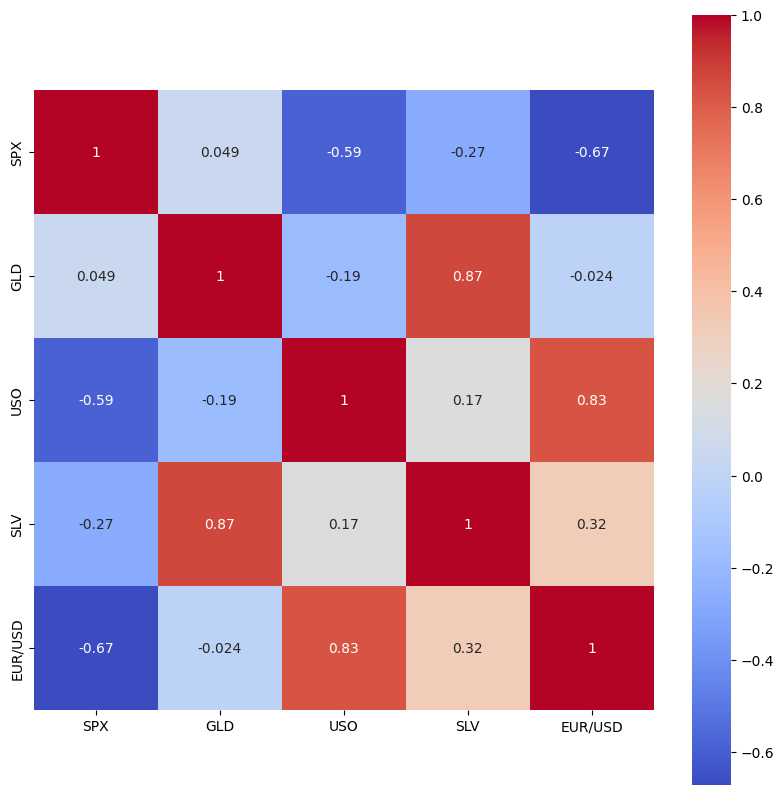

In [47]:
#Finding correlations
#If directly proportional - Positively correlated
#If inverse proportional - Negatively correlated
correlation = corr_data.corr()
plt.figure(figsize=(10,10))
sns.heatmap(correlation , square=True , annot=True , cbar=True , cmap='coolwarm')

In [48]:
#Looking at the correlations of the other stocks with gold
correlation['GLD']

,GLD
SPX,0.049345
GLD,1.000000
USO,-0.186360
SLV,0.866632
EUR/USD,-0.024375


/tmp/ipython-input-759876371.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_data['GLD'])


<Axes: xlabel='GLD', ylabel='Density'>

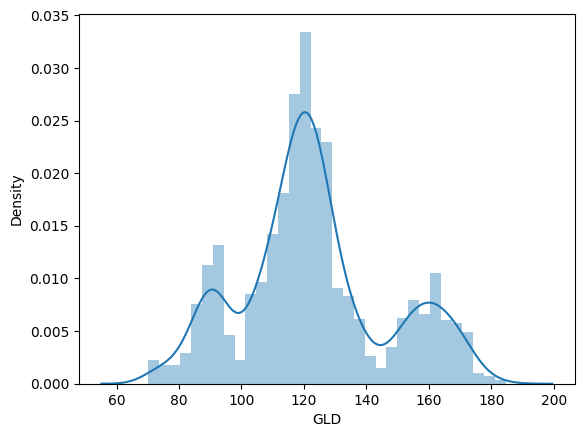

In [49]:
#Looking at the prices of gold
sns.distplot(train_data['GLD'])

In [50]:
#Preparing features and labels
X = train_data.drop(['Date' , 'GLD'] , axis=1)
Y = train_data['GLD']


In [51]:
#train and test split
X_train , X_test , Y_train , Y_test = train_test_split(X , Y , test_size=0.2)

In [52]:
X_train

,SPX,USO,SLV,EUR/USD
1049,1460.910034,34.099998,32.119999,1.311648
971,1313.319946,33.020000,27.120001,1.237471
297,908.130005,32.790001,13.980000,1.377297
376,1057.579956,35.959999,17.250000,1.478131
1601,2067.889893,16.840000,15.930000,1.073814
...,...,...,...,...
813,1129.560059,31.129999,34.919998,1.348090
1547,2028.260010,17.410000,15.870000,1.187070
120,1260.000000,106.669998,18.228001,1.579205
419,1106.410034,35.480000,16.870001,1.461903


In [53]:
#Training the model
model = RandomForestRegressor()
model.fit(X_train , Y_train)

RandomForestRegressor()

In [69]:
#Testing the model
predictions = model.predict(X_test)
predictions = list(predictions)
predictions

[np.float64(122.20830022999996),
 np.float64(113.56480032000002),
 np.float64(124.32399995000002),
 np.float64(148.77429901000008),
 np.float64(173.64819792999984),
 np.float64(128.16220012999992),
 np.float64(157.72719936000001),
 np.float64(114.19559947999998),
 np.float64(154.17270062),
 np.float64(129.10359830999997),
 np.float64(118.71060023999993),
 np.float64(115.00170015000005),
 np.float64(122.92519943000012),
 np.float64(121.47759942000002),
 np.float64(92.5493994399999),
 np.float64(137.48650012000007),
 np.float64(146.21949983),
 np.float64(89.01080082),
 np.float64(113.69360216000008),
 np.float64(127.71909919999989),
 np.float64(128.23349846999992),
 np.float64(121.78509846000009),
 np.float64(153.3809029200001),
 np.float64(161.92949839999994),
 np.float64(92.52499902000004),
 np.float64(155.99080054999985),
 np.float64(121.06999803999997),
 np.float64(102.19649970999996),
 np.float64(125.64299986),
 np.float64(101.96089943999996),
 np.float64(118.12769825000007),
 np.fl

In [78]:
#Getting model accuracy
accuracy = model.score(X_test , Y_test)
print(accuracy*100)

98.93623758402748


In [68]:
#Comparing between actual and predicted values
Actual = np.array(Y_test)
Actual = list(Actual)
Actual


[np.float64(122.209999),
 np.float64(115.849998),
 np.float64(126.199997),
 np.float64(139.919998),
 np.float64(173.919998),
 np.float64(129.210007),
 np.float64(159.050003),
 np.float64(114.830002),
 np.float64(135.039993),
 np.float64(129.220001),
 np.float64(116.629997),
 np.float64(115.669998),
 np.float64(119.75),
 np.float64(121.309998),
 np.float64(93.389999),
 np.float64(135.199997),
 np.float64(146.589996),
 np.float64(87.5),
 np.float64(112.660004),
 np.float64(127.959999),
 np.float64(130.169998),
 np.float64(121.629997),
 np.float64(153.380005),
 np.float64(162.559998),
 np.float64(93.870003),
 np.float64(157.929993),
 np.float64(121.300003),
 np.float64(102.260002),
 np.float64(124.889999),
 np.float64(106.459999),
 np.float64(118.099998),
 np.float64(116.330002),
 np.float64(160.639999),
 np.float64(166.550003),
 np.float64(167.270004),
 np.float64(115.940002),
 np.float64(128.830002),
 np.float64(84.150002),
 np.float64(137.220001),
 np.float64(162.699997),
 np.float64(1

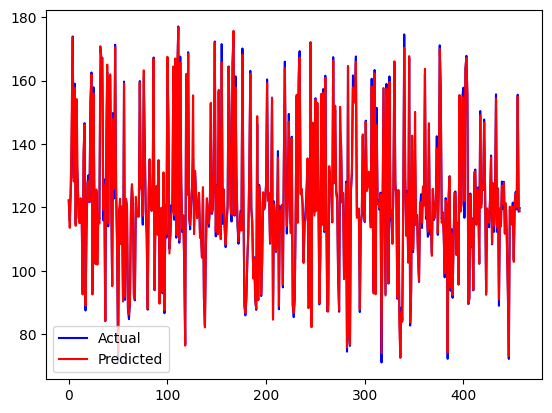

In [77]:
#PLotting the graph
plt.plot(Actual  , color='blue' , label='Actual')
plt.plot(predictions , color='red' , label='Predicted')
plt.legend()
plt.show()